<a href="https://colab.research.google.com/github/manishkr21/pytorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library import

In [301]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear

In [302]:
# w = torch.tensor(3.0, requires_grad= True)
# b = torch.tensor(1.0, requires_grad= True)

In [303]:
# make predition provided that you do have a model
# def forward(x):
#   y = w*x + b
#   return y

In [304]:
# x = torch.tensor(2)
# forward(x)   # our model predict here as 7

In [305]:
# x = torch.tensor([[4],[7]])
# forward(x)   # our model predict here as 7

In [306]:
# standard way to initialize a class

In [307]:
# torch.manual_seed(1)
# model = Linear(in_features = 1, out_features = 1)
# print(model.bias, model.weight)

In [308]:
# x = torch.tensor([2.0])
# print(model(x))

In [309]:
# x = torch.tensor([[2.0], [3.3]])
# print(model(x))

In [310]:
### Custom Modules

## **Model Class Constructor**

In [311]:
class LR(nn.Module):   # inherit the property of nn.Module class
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred


## **Model Instantiation**

In [312]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [313]:
# x = torch.tensor([1.0])
# print(model.forward(x))

In [314]:
# x = torch.tensor([[1.0],[2.0]])
# print(model.forward(x))

In [315]:
### Creating Dataset

## **Initializing Dataset**

Text(0.5, 0, 'x')

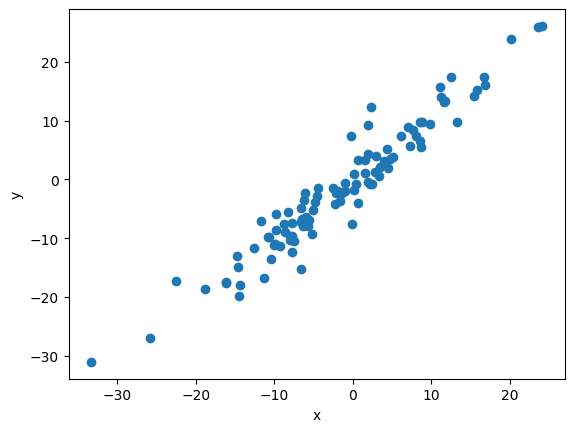

In [316]:
X = torch.randn(100, 1) * 10   # muliplyt with 10 to increase value
y = X + 3*torch.randn(100, 1)    # add noise
plt.plot(X,y, 'o')
plt.ylabel('y')
plt.xlabel('x')

## **Extracting Model Parameters**

In [317]:
[w,b] = model.parameters()

def get_params():
  return (w[0][0].item(), b[0].item())

## **Defining Plot_fit funtion**

In [318]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1* x1 + b1
  plt.plot(x1, y1, 'r')
  plt.grid()
  plt.scatter(X, y)
  plt.show()

## **Plotting Initial Model**

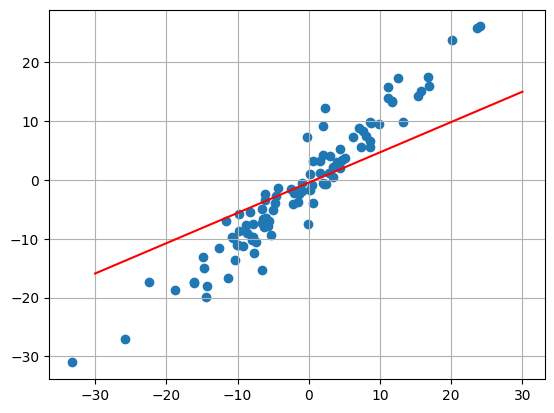

In [319]:
plot_fit('Initial Model')

In [320]:
### Mean Square Loss

## **Specifying Loss and Optimizer**

In [321]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

## **Training Model**

In [322]:
epochs = 100
losses = []
for i in range(epochs):

  # forward pass
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)     # calculate loss

  print("epoch:", i,"loss:", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad()           # make gradient zero

  # backward pass and optmization
  loss.backward()                 #
  optimizer.step()                # optimizer to reduce the weight

epoch: 0 loss: 36.448326110839844
epoch: 1 loss: 25.847070693969727
epoch: 2 loss: 19.274921417236328
epoch: 3 loss: 15.200486183166504
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.10822868347168
epoch: 6 loss: 10.137072563171387
epoch: 7 loss: 9.534791946411133
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.69587516784668
epoch: 12 loss: 8.640159606933594
epoch: 13 loss: 8.605380058288574
epoch: 14 loss: 8.583581924438477
epoch: 15 loss: 8.569831848144531
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551656723022461
epoch: 19 loss: 8.549099922180176
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545924186706543
epoch: 22 loss: 8.544849395751953
epoch: 23 loss: 8.543954849243164
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.54245662689209
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.5399

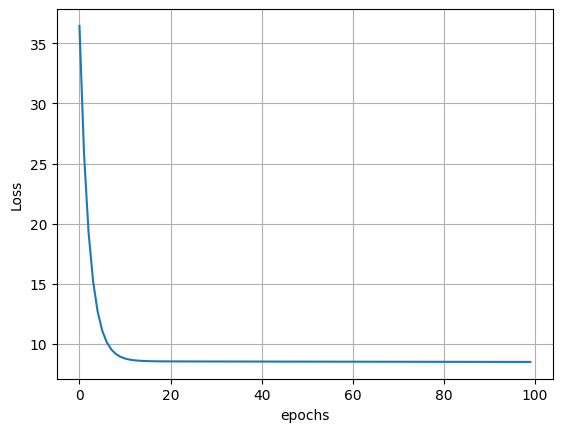

In [324]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.grid()

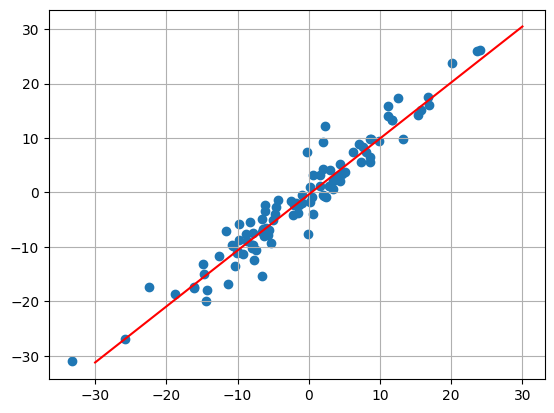

In [325]:
plot_fit("Trained Model")